In [107]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [108]:
##Reading Dataset
data= pd.read_csv('glass.csv')
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Checking duplicates

In [114]:
dup_check=pd.DataFrame(data.duplicated(subset=None,keep='first'))
dup_check

,0
0,False
1,False
2,False
3,False
4,False
...,...
208,False
209,False
210,False
211,False


In [115]:
###Giving column names for better understanding of dataset###
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
data.columns=names
data.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [116]:
##Checking sahpe of dataset###
data.shape

(213, 11)

In [117]:
##Checking null values in dataset###
data.isna().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

***NO Null values present is Dataset***

In [118]:
###Checking overall health of Data###
data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


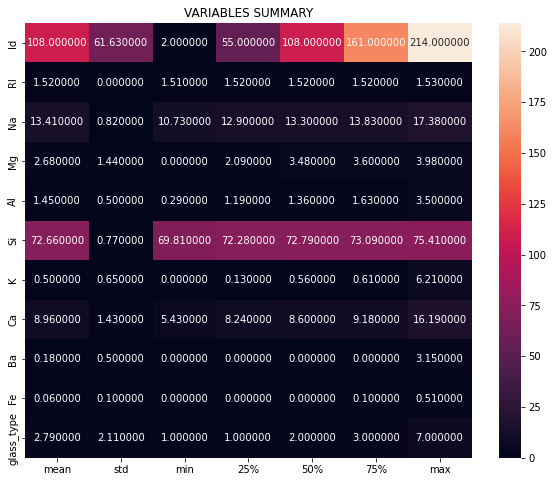

In [119]:
###Checking overall health of data by visualizing###
data.describe()
plt.figure(figsize=(10,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),annot=True,fmt="f")
plt.xticks
plt.yticks
plt.title("VARIABLES SUMMARY")
plt.show()

***Observations***

***id feature has no impact on dataset and we have by default indexing method,we are going to drop the column***

glass_type = This is our Target variable ,overall health is looking good

Fe = Fe feature is giving a sense of outliers present

Ba - Ba is givng a sense of outliers and even no values in min,25%,50%,75%,their is a only value in max

Ca - This feature is giving sense of skewness

K - Outliers and Skewness has been visualized

Si - Slight Skewness is present

AI- Overall health is looking good

Mg- Overall health is looking good

Na- Skewness is present

RI - Overall health is looking good


In [120]:
###Droping unecessary column###
data.drop(columns=['Id'],inplace=True)

***Lets check for outliers***

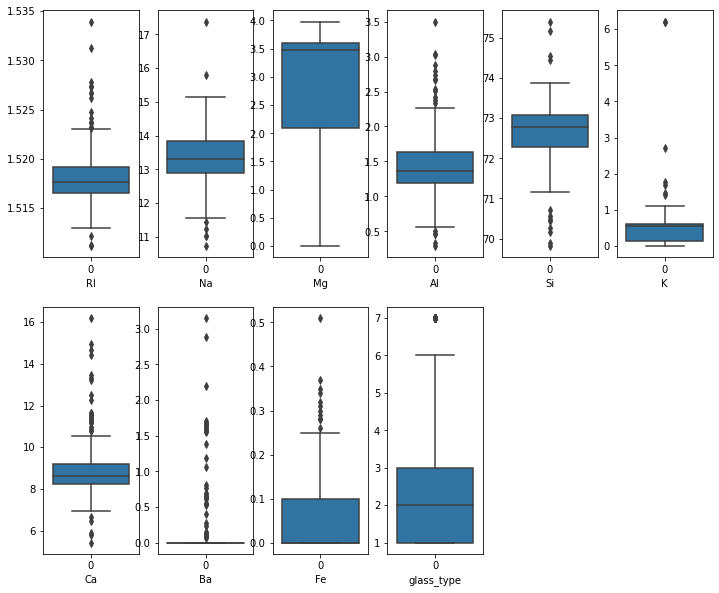

In [121]:
plt.figure(figsize=(12,10))
plotnumber=1
for column in data:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()    

***observations***

1. In RI feature outliers present on both higher and lower side

2. In Na feature outliers present on both higher and lower side

3. Mg feature has not outliers present

4. In Ai feature outliers present on both higher and lower side

5. In Si feature outliers present on both higher and lower side

6. In K outliers are present on higher side

7. In Ca feature outliers present on both higher and lower side

8. In Ba outliers are present on higher side

9. In Fe outliers are present on higher side

10. Glass type is our Target variable and as of now it has been visualized and their are merely a outlier present,which is a good sign


***We are going to treat the outliers in our Data Cleaning ***



***Lets check for Data Distribution***

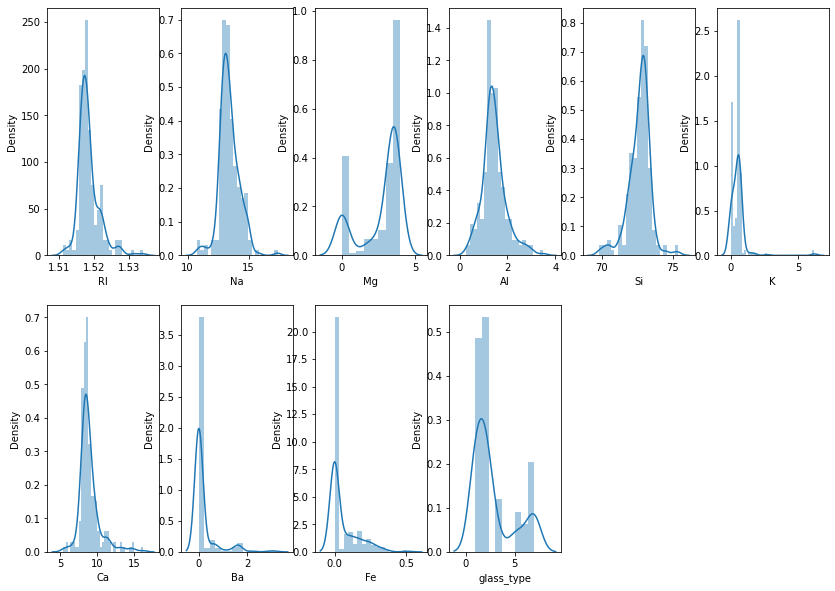

In [122]:
plt.figure(figsize=(14,10))
plotnumber=1
for column in data:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()    

***Observations***

1. RI and Na columns are not much skewed as confirmed above with boxplot outliers are their to be treated

2. Mg column is Biskewed 

3. Ai ,Si and k not showing much skewness but definately outliers has to be treated

4. Ca is not showing much skewness but it has to be visualized again after removing outliers

5. Ba and Fe are positively skewed we need to take them closer to normalized

***Treating Outliers by Z score***

In [123]:
from scipy.stats import zscore
z= np.abs(zscore(data))
z.shape

(213, 10)

In [124]:
len(np.where(z>3)[0])

33

In [125]:
data=data[(z<3).all(axis=1)]

In [126]:
data.shape

(193, 10)

***Percentage Loss after removing outliers***

In [127]:
print("Percentage Loss after removing outliers is=== ",20/213*100)

Percentage Loss after removing outliers is===  9.389671361502346


***Percentage Loss in acceptable,we have used zscore as dataset is already very small % percentage loss in under 10%***

***Seprating features and Label***

In [128]:
x= data.drop(columns=['glass_type'])
y= data['glass_type']

# Correlation & multi_collinearity check

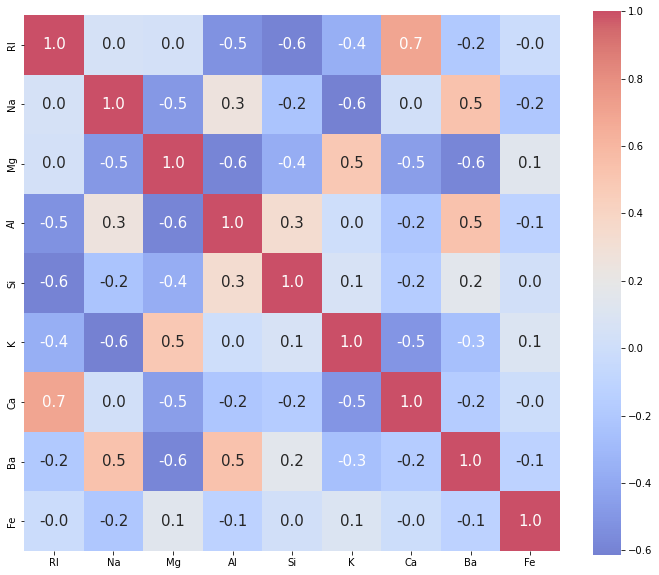

In [129]:
coreleation= x.corr()
plt.figure(figsize=(12,10))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=x.columns,yticklabels=x.columns,alpha=0.7,cmap= 'coolwarm')
plt.show()

***Our Diagram shows correaltion between different features Conclusion:***

1. RI and Ca have strong correlation between each other 

2. AI and ba have intermediate correlation between each other

# Features vs label

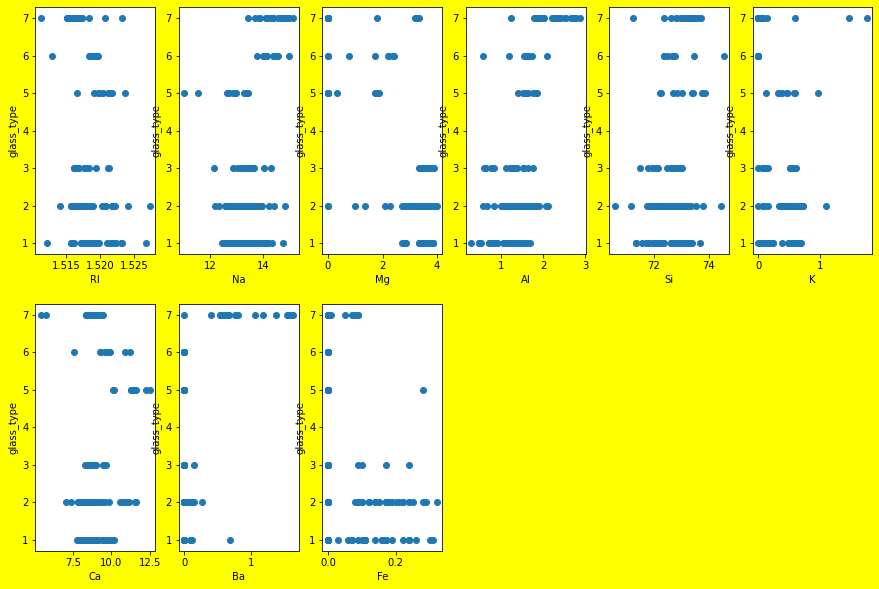

In [130]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('glass_type')
    
    plotnumber+=1
    
plt.show()    
    
    

***Observations***

***Every feature is showing relationship with target,since their has been some kind of doubt in visualization lets plot stripplot to check the same***

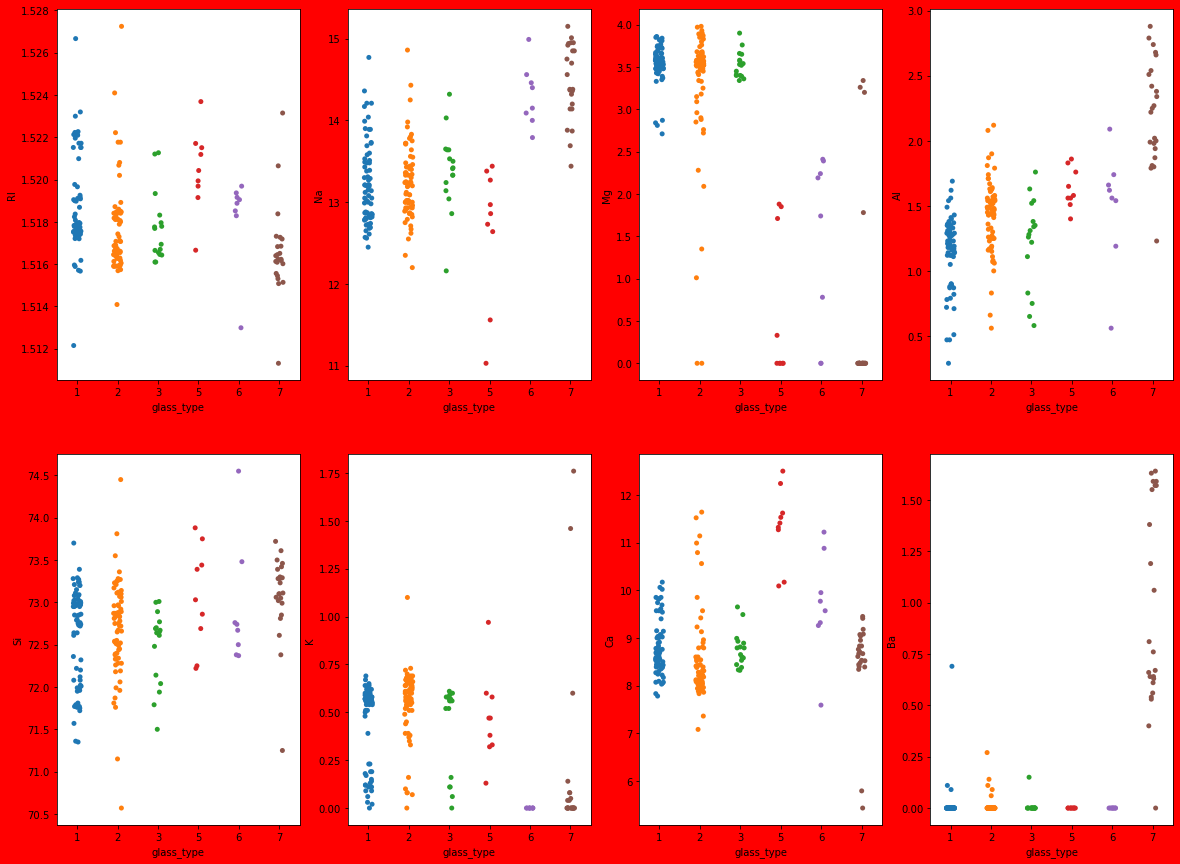

In [131]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.stripplot(y,x[column])
        
    
    plotnumber+=1
    
plt.show() 

***Observations***

Contribution of RI to Label is similar with increase in value

Na only contributes when the value is higher

Increase in values depreciates the contribution of Mg

Si,K,Ca and Ba are on samme scale when it comes to contributing to target



# Lets check the Distribution after treating outliers

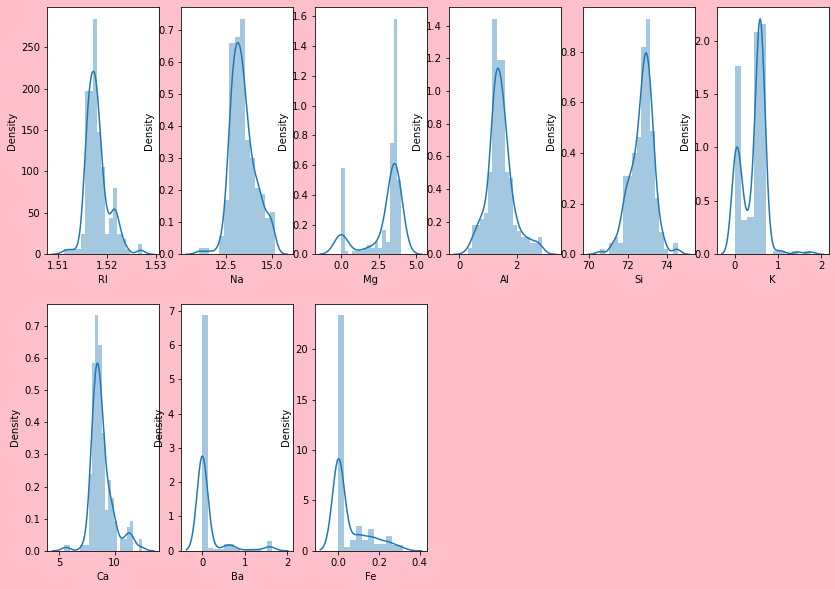

In [132]:
plt.figure(figsize=(14,10),facecolor='pink')
plotnumber=1
for column in x:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.distplot(x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show() 

# Distribution has been visualized as normal for features

***Visualization of Box-Plot***

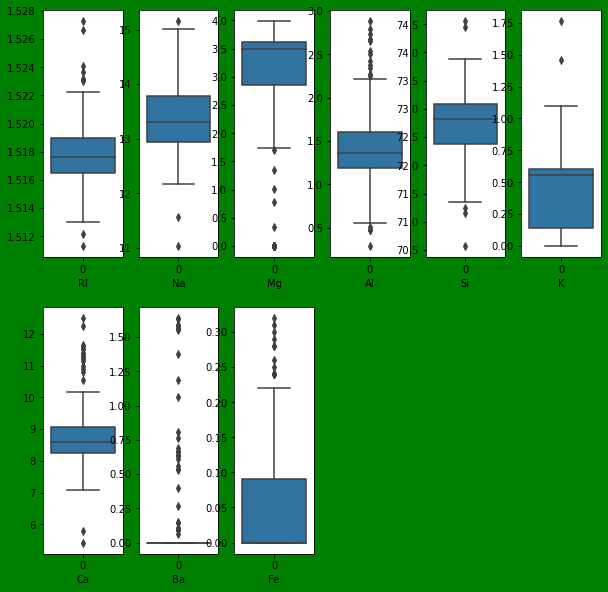

In [133]:
plt.figure(figsize=(10,10),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.boxplot(data=x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()    

# Outliers are in complete controll

<Figure size 576x576 with 0 Axes>

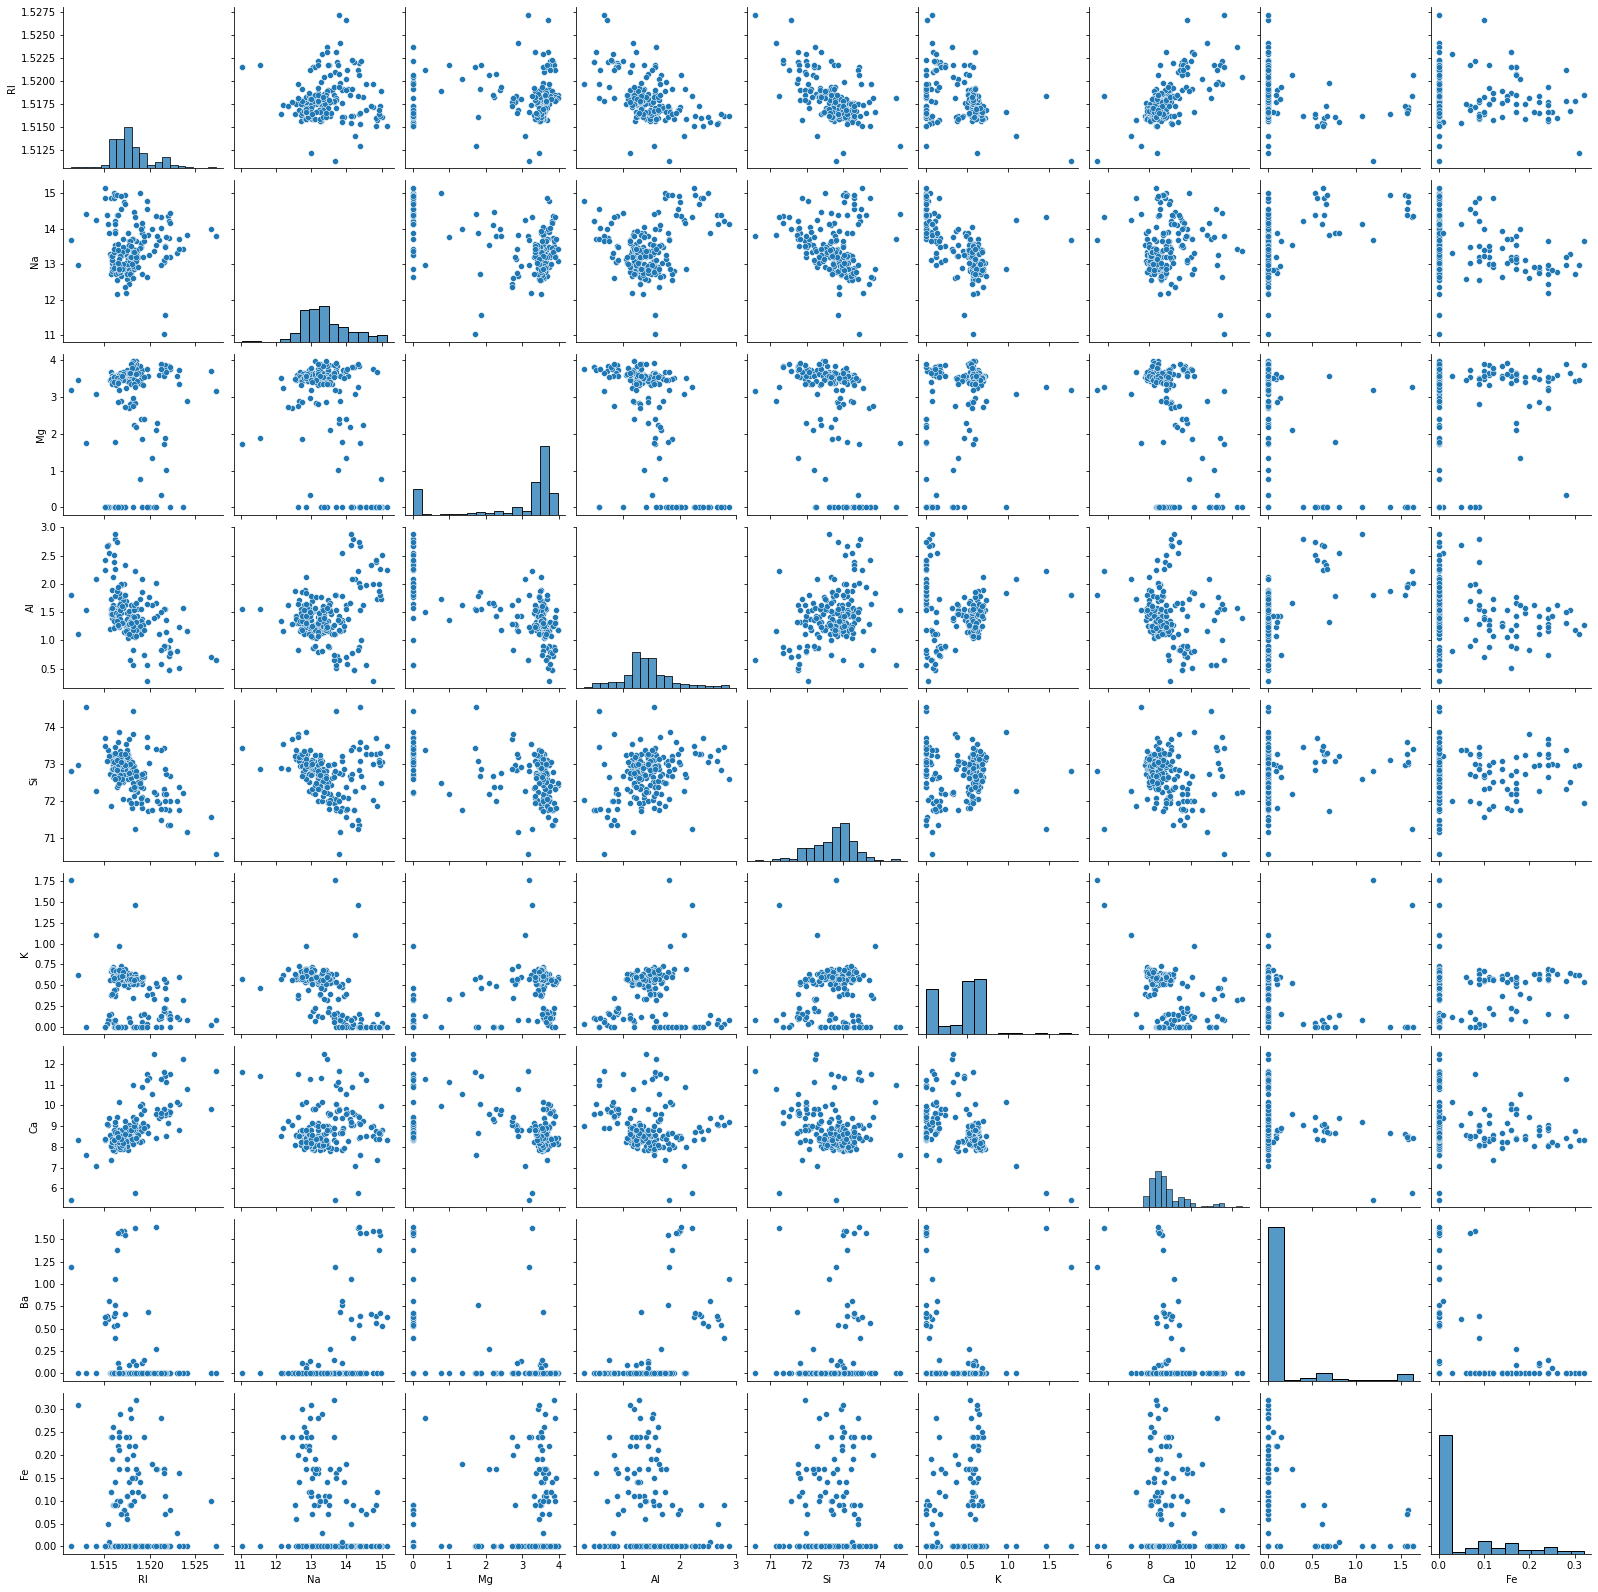

In [134]:
x2 = pd.DataFrame(x)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

# ***Skewness and Distribution are in complete controll as Visualized in above figures***

In [135]:
#Importing necessary Libraries
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [136]:
#Creating object for Standard Scaler
scaler = StandardScaler()

In [137]:
x_scaled = scaler.fit_transform(x)

# Lets proceed with train_test_split

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [139]:
LR=LogisticRegression()

In [140]:
LR.fit(x_train,y_train)

LogisticRegression()

# # Defining function to print Training,Testing score and Classification Report


In [141]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print("\n======Training Score=========")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:2f}%")
    
    elif train==False:
        y_pred=clf.predict(x_test)
        print("\n====Test Result is")
        print(f"\nAccuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%")
        print("\nClassification Report\n",classification_report(y_test,y_pred))

In [142]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:69.629630%

====Test Result is

Accuracy Score:68.97%

Classification Report
               precision    recall  f1-score   support

           1       0.70      0.70      0.70        20
           2       0.61      0.85      0.71        20
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.86      0.67      0.75         9

    accuracy                           0.69        58
   macro avg       0.69      0.65      0.66        58
weighted avg       0.65      0.69      0.66        58



In [143]:
# Confusion Matrix
y_pred = LR.predict(x_test)


In [151]:
print("Confusion Matrix ========>\n",confusion_matrix(y_test,y_pred))

Confusion Matrix ========>
 [[14  6  0  0  0  0]
 [ 3 17  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  2  1]
 [ 0  3  0  0  0  6]]


# # Cross Validations

In [152]:
from sklearn.model_selection import KFold,cross_val_score

In [153]:
cross_val_score(LR,x_scaled,y,cv=5).mean()

0.6475033738191632

***Logistic Regression score***

****F1score=69%
    
    
***CV score = 64%

#  This is about Logistic Regression, we got a good score with Logistic Regression ,now Lets move to KNN algorithm for model building

In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
knn = KNeighborsClassifier()

In [158]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

# Printing Training,Testing score and Classification report

In [159]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:77.037037%

====Test Result is

Accuracy Score:68.97%

Classification Report
               precision    recall  f1-score   support

           1       0.67      0.80      0.73        20
           2       0.62      0.75      0.68        20
           3       0.00      0.00      0.00         5
           5       0.50      1.00      0.67         1
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         9

    accuracy                           0.69        58
   macro avg       0.63      0.65      0.61        58
weighted avg       0.66      0.69      0.66        58



# Cross validation score

In [160]:
cross_val_score(knn,x_scaled,y,cv=5).mean()

0.6838056680161942

# Confusion Matrix¶


In [161]:
y_pred= knn.predict(x_test)

In [162]:
confusion_matrix(y_test,y_pred)

array([[16,  4,  0,  0,  0,  0],
       [ 4, 15,  0,  1,  0,  0],
       [ 3,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 1,  2,  0,  0,  0,  6]], dtype=int64)

#  F1Score = 69%
# CV Score = 68%

# This is about KNN,again satisfactory score.
## Lets try with RandomForestClassifier

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
Rf= RandomForestClassifier()

In [165]:
Rf.fit(x_train,y_train)

RandomForestClassifier()

In [166]:
metric_score(Rf,x_train,x_test,y_train,y_test,train=True)
metric_score(Rf,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:100.000000%

====Test Result is

Accuracy Score:79.31%

Classification Report
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       0.72      0.90      0.80        20
           3       0.67      0.40      0.50         5
           5       1.00      1.00      1.00         1
           6       1.00      0.33      0.50         3
           7       1.00      0.67      0.80         9

    accuracy                           0.79        58
   macro avg       0.87      0.70      0.74        58
weighted avg       0.81      0.79      0.78        58



# Cross validation

In [168]:
cross_val_score(Rf,x_scaled,y,cv=5).mean()

0.7255060728744939

# Confusion Matrix

In [169]:
y_pred= Rf.predict(x_test)

In [170]:
confusion_matrix(y_test,y_pred)

array([[18,  2,  0,  0,  0,  0],
       [ 1, 18,  1,  0,  0,  0],
       [ 2,  1,  2,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  1,  0],
       [ 1,  2,  0,  0,  0,  6]], dtype=int64)

**** F1 Score = 79%****
     
**** CV score = 72%****

# Lets try GradientBoostingClassifier

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
gbc=GradientBoostingClassifier()

In [173]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [174]:
metric_score(gbc,x_train,x_test,y_train,y_test,train=True)
metric_score(gbc,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:100.000000%

====Test Result is

Accuracy Score:75.86%

Classification Report
               precision    recall  f1-score   support

           1       0.75      0.90      0.82        20
           2       0.73      0.80      0.76        20
           3       0.67      0.40      0.50         5
           5       0.50      1.00      0.67         1
           6       1.00      0.33      0.50         3
           7       1.00      0.67      0.80         9

    accuracy                           0.76        58
   macro avg       0.77      0.68      0.67        58
weighted avg       0.78      0.76      0.75        58



# Cross validation score

In [175]:
cross_val_score(gbc,x_scaled,y,cv=5).mean()

0.6991902834008097

# Confusion Matrix

In [176]:
confusion_matrix(y_test,y_pred)

array([[18,  2,  0,  0,  0,  0],
       [ 1, 18,  1,  0,  0,  0],
       [ 2,  1,  2,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  1,  0],
       [ 1,  2,  0,  0,  0,  6]], dtype=int64)

***F1 score = 76%

***CV score = 69%

# **KNN Model is giving the least difference amongst scores of models,Lets do Hyperparameter of our Model

In [179]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [180]:
params = {'algorithm':['kd_tree','brute'],
         'leaf_size':[3,5,6,7],
         'n_neighbors':[3,5,7,9,11],
         'weights':['uniform','distance']}

In [182]:
grid_search = GridSearchCV(estimator=knn,param_grid=params)

In [183]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [184]:
grid_search.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 3,
 'n_neighbors': 5,
 'weights': 'distance'}

In [187]:
knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=5,weights='distance')

In [188]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, weights='distance')

#  Score post HyperParameterTuning


In [189]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


======Training Score=========
Accuracy Score:100.000000%

====Test Result is

Accuracy Score:74.14%

Classification Report
               precision    recall  f1-score   support

           1       0.71      0.85      0.77        20
           2       0.73      0.80      0.76        20
           3       1.00      0.20      0.33         5
           5       0.50      1.00      0.67         1
           6       1.00      0.67      0.80         3
           7       0.86      0.67      0.75         9

    accuracy                           0.74        58
   macro avg       0.80      0.70      0.68        58
weighted avg       0.77      0.74      0.73        58



# Test accuracy and F1 score are 74%

***Saving the final KNN model***

In [191]:
import pickle

In [193]:
pickle.dump(knn,open('KNN_GLASS','wb'))

# Model is completed